In [1]:
#The Iris dataset is consists of 4 variables (sepal length, sepal width, petal length, petal width), 3 groups (Setosa, Versicolor, Virginica) and 150 observations. The last column of the data is Iris species.

import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris

iris= load_iris()
df= pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                  columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))

In [ ]:
iris.shape

In [ ]:
print(iris.head(10))

In [ ]:
print(iris.tail(10))

In [ ]:
iris.rename(columns= {'sepal length (cm)': 'sep_len', 'sepal width (cm)': 'sep_wid', 'petal length (cm)': 'pet_len', 'petal width (cm)': 'pet_wid'}, inplace= True)

In [ ]:
import sklearn as preprocessing

In [ ]:
iris.describe()
#the output shows that there is not anything unusuall.

In [ ]:
iris.isnull().sum()

In [ ]:
iris.duplicated().sum()
#the output shows that there is one duplicated data, but wo do not drop that.

In [ ]:
#group and aggregate (to show numerical values against categorical ones):
cat_var= iris.groupby(iris['target'])
cat_var.mean()

In [ ]:
#outliers:
iris.quantile(0.25)
#output shows the Q1s.

iris.quantile(0.5)
#output shows the medians.

iris.quantile(0.75)
#output shows the Q3s.

import matplotlib.pyplot as plt
iris.boxplot()
plt.show()

IQR_sep_len= 6.4 - 5.1
up_sep_len= 6.4 + 3/2 * IQR_sep_len
up_sep_len

low_sep_len= 5.1 - 3/2 * IQR_sep_len
low_sep_len

#the output shows that there is an outlier in Sepal Length (because max= 7.9).

IQR_sep_wid= 3.3 - 2.8
up_sep_wid= 3.3 + 3/2 * IQR_sep_wid
up_sep_wid

low_sep_wid= 2.8 + 3/2 * IQR_sep_wid
low_sep_wid

#the output shows that there is no outlier in Sepal Width (max= 4.4, min= 2)

IQR_pet_len= 5.1 - 1.6
up_pet_len= 5.1 + 3/2 * IQR_pet_len
up_pet_len

low_pet_len= 1.6 - 3/2 * IQR_pet_len
low_pet_len

#there are outliers in Petal Length (max= 6.9, min= 1)

IQR_pet_wid= 1.8 - 0.3
up_pet_wid= 1.8 + 3/2 * IQR_pet_wid
up_pet_wid

low_pet_wid= 0.3 - 3/2 * IQR_pet_wid
low_pet_wid

#there are outliers in Petal Width (max= 2.5, min= 0.1)

In [ ]:
#because we have outliers, we use Standardisation to scaling data:
from sklearn.preprocessing import scale
scale_data= scale (iris[['sep_len', 'sep_wid', 'pet_len', 'pet_wid']])
scale_data

In [ ]:
import seaborn as sb
num_var= iris.drop([], axis= 1)
corr= num_var.corr()
sb.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, vmin= -1, vmax= +1)
plt.show()

In [ ]:
sb.pairplot(iris, hue= 'target', palette= 'hls', plot_kws= {'s': 80})

In [ ]:
#We use histograms to see the distributions:
iris['pet_len'].hist(color= ['gold'])

In [ ]:
iris['pet_wid'].hist(color= ['black'])

In [ ]:
iris['sep_len'].hist(color= ['forestgreen'])

In [ ]:
iris['pet_len'].hist(color= ['violet'])

In [ ]:
count= iris.pet_len.value_counts()
category= count.index
plt.bar(category, count, color= ['green', 'pink', 'black', 'yellow', 'red'])
plt.xlabel('Petal Length')
plt.ylabel('Counts')
plt.show()

Supervised Learning

In [2]:
#Our data are discrete, so we use Classification.
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [3]:
#We make a DataFrame:
iris.data
iris_df= pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df.rename(columns= {'sepal length (cm)': 'sep_len', 'sepal width (cm)': 'sep_wid', 'petal length (cm)': 'pet_len', 'petal width (cm)': 'pet_wid'}, inplace= True)
iris_df['target']= iris.target
iris_df

,sep_len,sep_wid,pet_len,pet_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


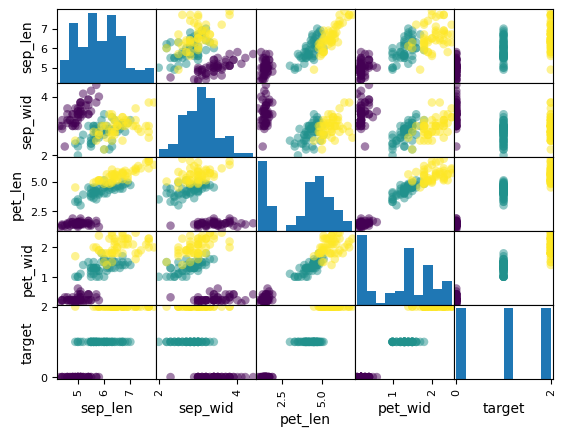

In [ ]:
#We wanna know how the values are corrolated statistically.
#Visual EDA:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(iris_df, c= iris.target, s= 150)
plt.show()

First Algorithm: KNN (K-Nearest Neighbors)

In [4]:
#Step 1: training data.
x= iris.data
y= iris.target
print(x[2], y[2])

[4.7 3.2 1.3 0.2] 0


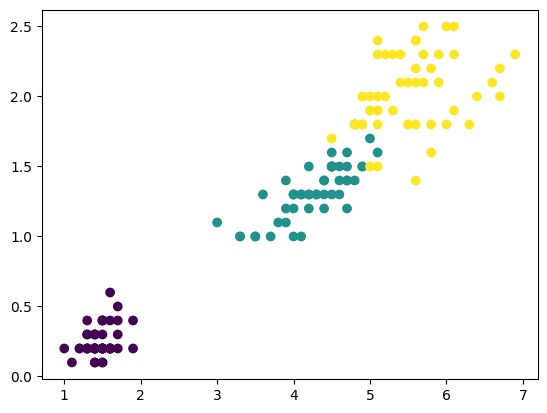

In [ ]:
x= iris.data[:, [2, 3]]
y= iris.target
plt.scatter(x[:, 0], x[:, 1], c= y)
plt.show()

Fit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 6, metric= 'minkowski', p= 2)
x= iris.data
y= iris.target
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

Predict

In [ ]:
#Step 2: Predict.
x_new= np.array([[5, 3, 1, 0.2]])
y_new= knn.predict(x_new)
y_new
#the output shows the predicted index.

array([0])

Spliting data

In [ ]:
#We wanna evaluate the accaracy of Classifier, so we train and test:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42, stratify= y)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
x_test.shape

(45, 4)

Evaluation Model

In [ ]:
knn= KNeighborsClassifier(n_neighbors= 6)
knn.fit(x_train, y_train)
y_predict= knn.predict(x_test)
y_predict
#the output shows the 45 data.

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [ ]:
#to comparison:
knn.score(x_test, y_test)

0.9333333333333333

Overfitting and underfitting

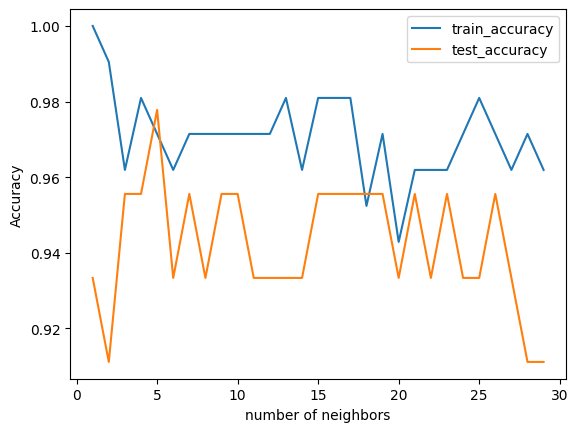

In [ ]:
#We wanna find the optimized k, so we use a FOR loop:
import matplotlib.pyplot as plt

neighbors= np.arange(1, 30)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn_model= KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i]= knn_model.score(x_train, y_train)  #this measures the accuracy of training
    test_accuracy[i]= knn_model.score(x_test, y_test)  #this measures the accuracy of testing (prediction)
plt.plot(neighbors, train_accuracy, label= 'train_accuracy')
plt.plot(neighbors, test_accuracy, label= 'test_accuracy')  
plt.legend()  #for better comparison
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#the output shows that train is in its best position around k=1, unlike test; test is in its best position around k= 5; And test is in its best position around k=30, unlike train.
#so the optimized value for k is 5 (it gives around 97 percent accuracy).

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predict)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



Regression (Linear)

In [ ]:
#predict:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)
y_predict= reg.predict(x_test)

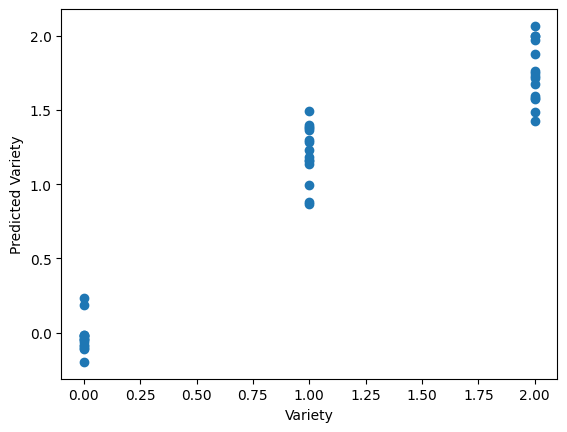

In [ ]:
#compare:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict)
plt.xlabel('Variety')
plt.ylabel('Predicted Variety')
plt.show()

#????

In [ ]:
#error checking: MSE
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_predict)
MSE
#the output shows the mean squared error.

0.06373864399167818

In [ ]:
#now we can compare this with just 2 features:
xnew= iris.data[:, [1, 2]]
ynew= iris.target
xnew_train, xnew_test, ynew_train, ynew_test= train_test_split(xnew, ynew, test_size= 0.3, random_state= 42)
reg1= LinearRegression()
reg1.fit(xnew_train, ynew_train)
ynew_predict= reg1.predict(xnew_test)
MSE_new= mean_squared_error(ynew_test, ynew_predict)
MSE_new
#they are almost the same!!

0.06306499864308791

CrossValidation (K-Fold Cross Validation)

In [ ]:
from sklearn.model_selection import cross_val_score
reg= LinearRegression()
cv_score= cross_val_score(reg, x, y, cv= 5) #cv shows the number of Folds.
cv_score
#the output shows 5 different MSEs for 5 Folds.

array([0.        , 0.85124923, 0.        , 0.76155439, 0.        ])

In [ ]:
#we can use the mean of them too:
np.mean(cv_score)

0.3225607248900085

Second Algorithm: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc= dtc.predict(x_test)

from sklearn import metrics
metrics.accuracy_score(y_test, predict_dtc)

0.9777777777777777

Third Algorithm: Random Forest

In [ ]:
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test= train_test_split(x, y, train_size= 0.7, random_state= 42)
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(random_state= 42, n_jobs= -1, max_depth= 5, n_estimators= 100, oob_score= True)
RF.fit(X_train, Y_train)
RF.oob_score_

0.9428571428571428

In [ ]:
predict_RF = RF.predict(X_test)

Fifth Algorithm: SVM

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel='linear')
svc.fit(x_train, y_train)
y_predict= svc.predict(x_test)

VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score  #F1 score is an evaluation metric that measures a model's accuracy (combines precision and recall scores to show how many times a model made a correct prediction across the entire dataset).

f1_knn= f1_score(y_test, y_predict,  average= 'micro')  #averaging the total true positives, false negatives and false positives.
f1_dtc= f1_score(y_test, predict_dtc,  average= 'micro')
f1_RF= f1_score(Y_test, predict_RF,  average= 'micro')
f1_SVM= f1_score(y_test, y_predict,  average= 'micro')

print(f'F1-score of KNN classifier: {f1_knn}')
print(f'F1-score of DecisionTree classifier: {f1_dtc}')
print(f'F1-score of RandomForest classifier: {f1_RF}')
print(f'F1-score of SVM classifier:  {f1_SVM}')

F1-score of KNN classifier: 1.0
F1-score of DecisionTree classifier: 0.9777777777777777
F1-score of RandomForest classifier: 1.0
F1-score of SVM classifier:  1.0


Fourth Algorithm: PCA

1) Decorrelation

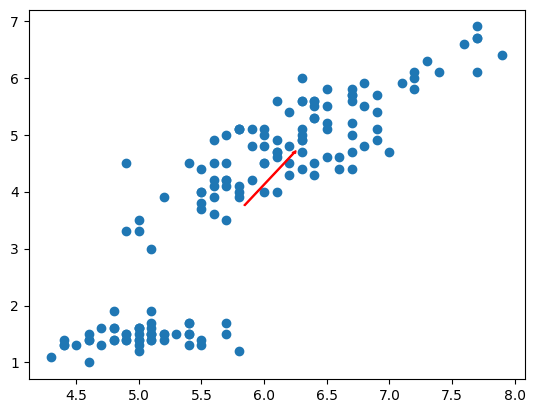

In [ ]:
#We use first and third features only:
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
iris_model= PCA()
iris_model.fit(iris.data[:, [0, 2]])
iris_transformed= iris_model.transform(iris.data[:, [0, 2]])
mean= iris_model.mean_
First_PC= iris_model.components_[0]
plt.scatter(iris.data[:, 0], iris.data[:, 2])
plt.arrow(mean[0], mean[1], First_PC[0], First_PC[1], color= 'red', width= 0.01)

In [ ]:
plt.scatter(iris_transformed[:, 0], iris_transformed[:, 1])
plt.show()

2) Reduce dimension

intrinsic dimension

In [ ]:
dim_r= PCA(n_components= 2)
dim_r.fit(iris.data)
dim_r_transformed= dim_r.transform(iris.data)
print(dim_r_transformed)
#the output describes data by just 2 dim.

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

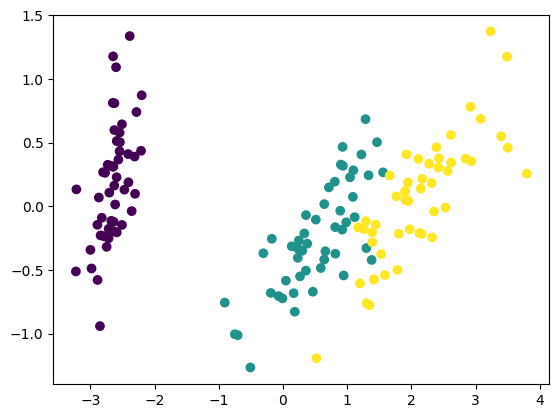

In [ ]:
plt.scatter(dim_r_transformed[:, 0], dim_r_transformed[:, 1], c= iris.target)
plt.show()
#the output shows that PCA removed the correlation and put the mean on 0 and reduced the dimension to 2.

Unsupervised

1) K-Means

In [6]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters= 3)
km.fit(x)
labels= km.predict(x)
labels
#KmMeans splits the data to 3 parts.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

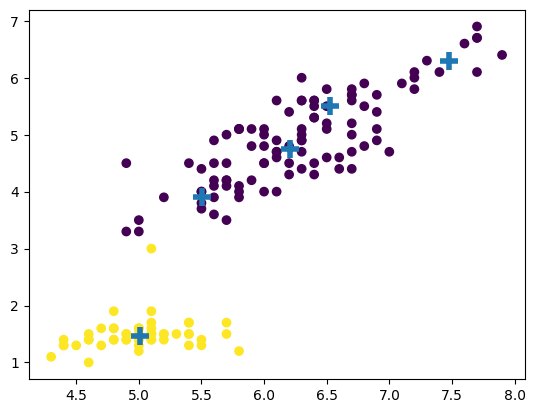

In [25]:
#showing the data with labels (just 2 features):
import matplotlib.pyplot as plt
centers= km.cluster_centers_
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.scatter(centers[:, 0], centers[:, 2], marker= '+', s= 150, linewidth= 4)
plt.show()

Evaluate a clustering

In [10]:
#but how many clusters do we need?
km.inertia_

78.851441426146

In [12]:
#finding the best inertia:
inertia= []
for i in np.arange(1, 6):
    km= KMeans(n_clusters= i)
    km.fit(x)
    inertia.append(km.inertia_)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.25600931571816,
 46.446182051282065]

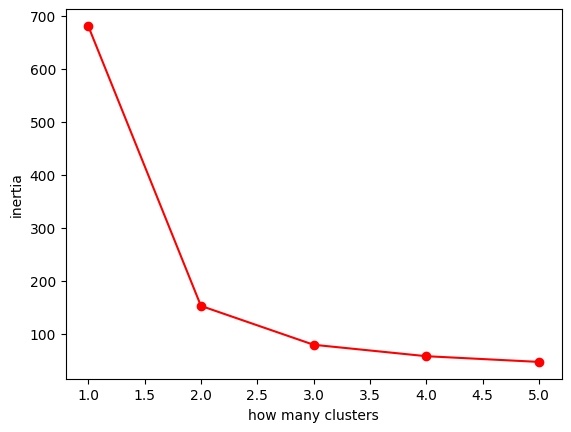

In [14]:
#to judging better:
plt.plot(np.arange(1, 6), inertia, 'ro-')
plt.xlabel('how many clusters')
plt.ylabel('inertia')
plt.show()

#3 is the best

2) Hierarchical Clustering

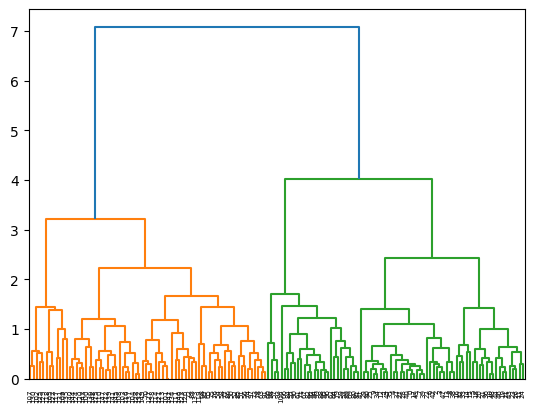

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
hier= linkage(x, method= 'complete')
dendrogram(hier)
plt.show()

In [17]:
labels= fcluster(hier, 5, criterion= 'distance')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

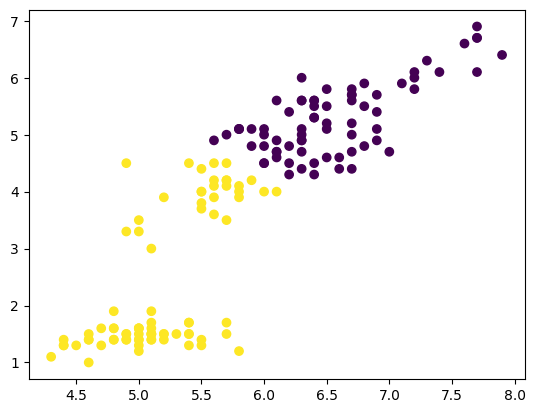

In [18]:
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.show()

3) Meanshift

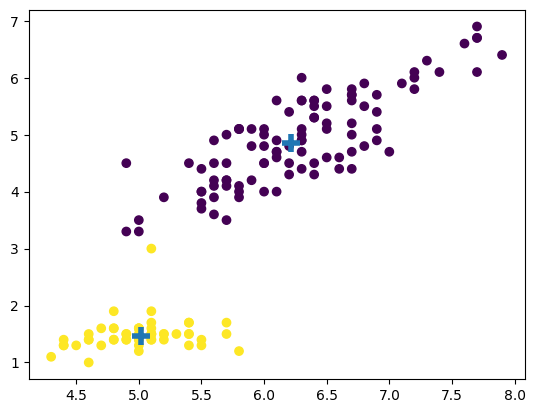

In [26]:
from sklearn.cluster import MeanShift
ms= MeanShift()
ms.fit(x)
labels= ms.labels_
center= ms.cluster_centers_
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.scatter(center[:, 0], center[:, 2], marker= '+', s= 150, linewidth= 4)
plt.show()

Bandwidth

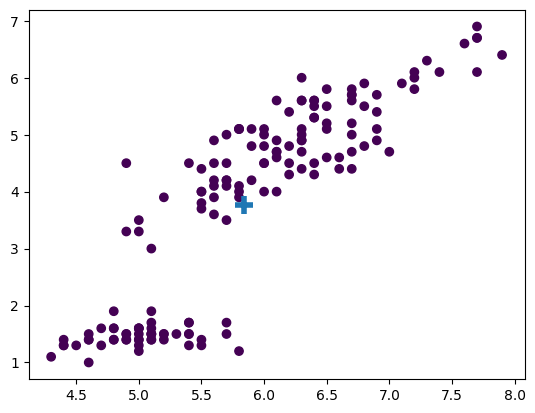

In [27]:
ms= MeanShift(bandwidth= 5)
ms.fit(x)
labels= ms.labels_
center= ms.cluster_centers_
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.scatter(center[:, 0], center[:, 2], marker= '+', s= 150, linewidth= 4)
plt.show()

4) DBSCAN (Density-Based Special Clustering of Applications with Noise)

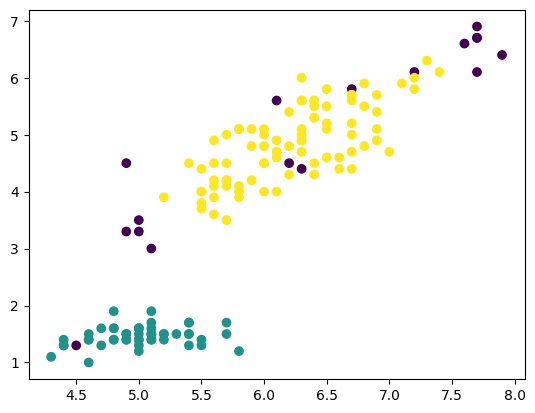

In [28]:
from sklearn.cluster import DBSCAN
db= DBSCAN()  #with default parameters
db.fit(x)
labels= db.labels_
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.show()

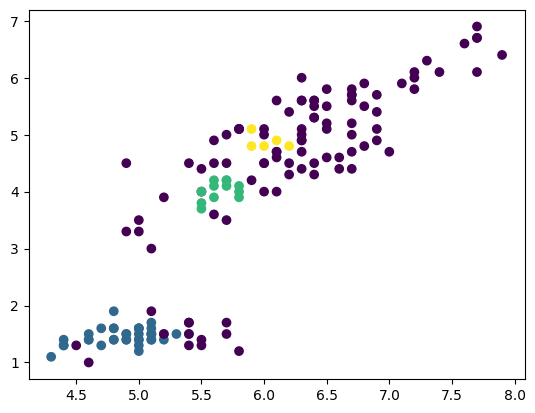

In [33]:
from sklearn.cluster import DBSCAN
db= DBSCAN(eps= 0.3, min_samples= 5)  #with given parameters
db.fit(x)
labels= db.labels_
plt.scatter(x[:, 0], x[:, 2], c= labels)
plt.show()